In [11]:
import os
import pandas as pd
snmem="/gpfs/scratch/ahurtado/large_polar_low"
ahurt="/home/adrianhurtado/testing/madness-test-suite/large_polar_low/"
os.chdir(ahurt)
from madnessReader import MadnessReader
from madnessReader import ExcitedData
from madnessReader import FrequencyData
from madnessReader import *
from daltonRunner import DaltonRunner
import matplotlib.pyplot as plt
dalton_reader = DaltonRunner()
dalton_reader.Np=4

4


In [12]:
basis_list=['aug-cc-pVDZ','aug-cc-pVTZ','aug-cc-pVQZ','aug-cc-pV5Z','aug-cc-pV6Z']
d_basis_list=['d-aug-cc-pVDZ','d-aug-cc-pVTZ','d-aug-cc-pVQZ','d-aug-cc-pV5Z','d-aug-cc-pV6Z']

In [15]:
import json
converged=[]
not_converged=[]
not_found=[]
Type_Error=[]
json_error=[]
for g in glob.glob('molecules/*.mol'):
    m = g.split('/')
    mol = m[1].split('.')[0]
    print(mol)
    try:
        ben=FrequencyData(mol,'hf','dipole')
        if ben.converged.all() and ben.converged.sum()==5:
            converged.append(mol)
        else:
            not_converged.append(mol)
    except FileNotFoundError as f:
        print(mol,f)
        not_found.append(mol)
    except TypeError as f:
        print(mol,f)
        Type_Error.append(mol)
    except json.decoder.JSONDecodeError as j:
        json_error.append(mol)
        print(mol,j)
        
            


CSO
LiH
FCN
P2H4
OCl2
LiH_s
SH2
0.1153005  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/SH2/dipole_hf_0-115301/response_base.json'
Li2
NaCl
C2H2
BH3
HCONH2
CH3SH
P2
BH2Cl
NaCN
0.028957375  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/NaCN/dipole_hf_0-028957/response_base.json'
HCN
CH3OH
HBS
C2H4
SO2
HNC
Na2
0.00910725  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/Na2/dipole_hf_0-009107/response_base.json'
F2
N2
SiH4
N2H2
0.0673115  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H2/dipole_hf_0-067311/response_base.json'
CH3NH2
NH3O
HOF
He
HF
OF2
ClF
HCOOH
NH3
CH3Cl
Mg2
N2H4
0.0611185  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H4/dipole_hf

/home/adrianhurtado/testing/madness-test-suite/madness-test-suite/madnessReader.py:304: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  return params, iter_data, k_data, thresh_data, d_res_data, bsh_res_data, full_freq_data, rdf, wall_time, cpu_time, pd.Series(


In [17]:
num_c=len(converged)
num_n=len(not_converged)
num_nf=len(not_found)
num_json_e=len(json_error)
num_type_e=len(Type_Error)

total=num_c+num_n+num_nf+num_json_e+num_type_e
print("converged : ",num_c)
print("not converged : ",num_n)
print("not found : ",num_nf)
print("json error : ",num_json_e)
print("type error : ",num_type_e)
print("total : ",total)


converged :  33
not converged :  53
not found :  0
json error :  3
type error :  1
total :  90


In [27]:
non_converged=[]
part_converged=[]
if True:
    for mol in not_converged:
        check=FrequencyData(mol,'hf','dipole')
        if(check.converged.any()):
            #print(mol,'\n',check.converged)
            part_converged.append(mol)
        else:
            non_converged.append(mol)
num_non_converged=len(non_converged)
num_part_converged=len(part_converged)

            

0.1153005  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/SH2/dipole_hf_0-115301/response_base.json'
0.028957375  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/NaCN/dipole_hf_0-028957/response_base.json'
0.00910725  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/Na2/dipole_hf_0-009107/response_base.json'
0.0673115  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H2/dipole_hf_0-067311/response_base.json'
0.0611185  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/N2H4/dipole_hf_0-061118/response_base.json'
0.08383475  not found: [Errno 2] No such file or directory: '/home/adrianhurtado/testing/madness-test-suite/large_polar_low/hf/SiH3F/dipole_hf_0-0838

In [29]:
print("Part Converged : ",num_part_converged)

Not at all converged :  23
Part Converged :  30


HCP converged:  0.0             True
0.008237875     True
0.01647575     False
0.0329515      False
0.065903       False
dtype: bool


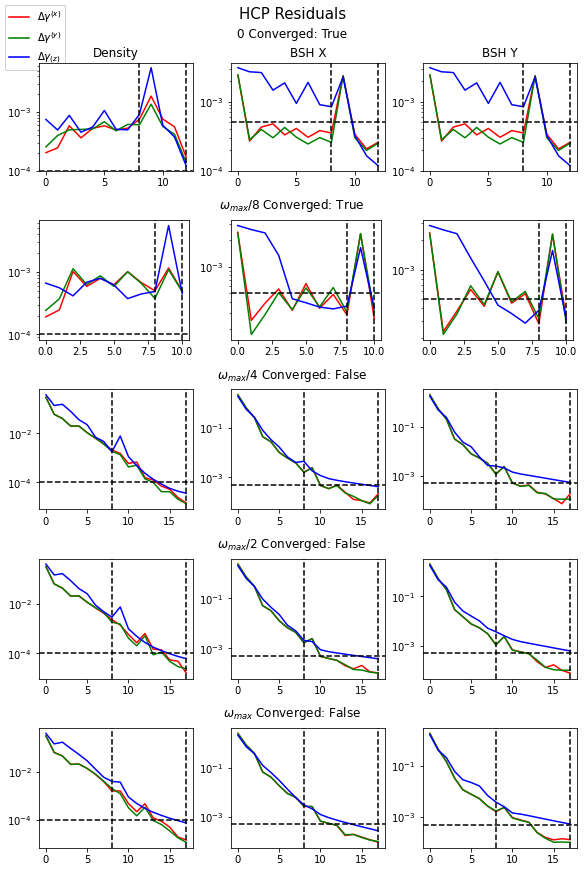

In [64]:
display_convergence_plots(part_converged[29],'hf','dipole',False)

In [ ]:
print("Not at all converged : ",num_non_converged)

CO converged:  0.0             False
0.0201593125    False
0.040318625     False
0.08063725      False
0.1612745       False
dtype: bool


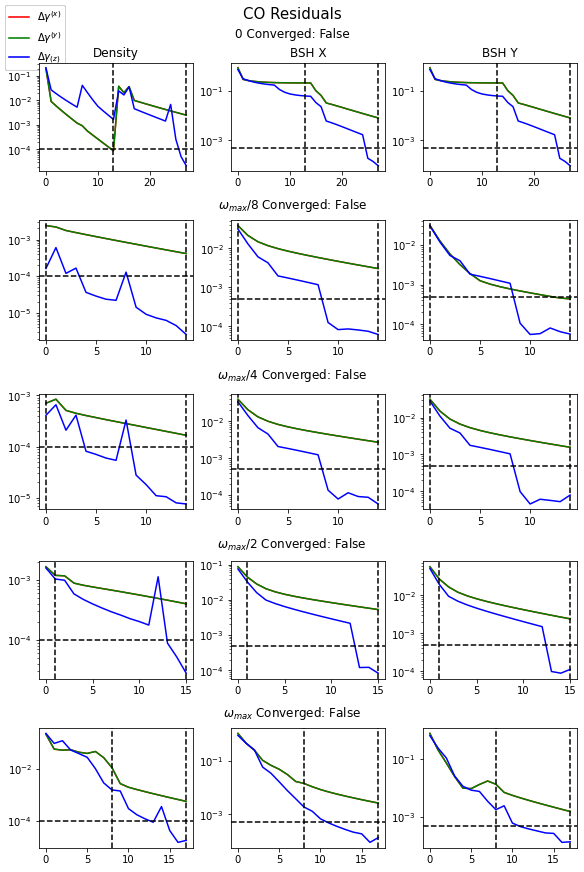

In [83]:
display_convergence_plots(non_converged[17],'hf','dipole',False)